In [1]:
data = {
    "esp32":{
        'sleep (µA)':10,
        'peak (mA)':240,
        'receive only (mA)':100
    },
    "esp8684":{
        'sleep (µA)':5,
        'peak (mA)':370,
        'receive only (mA)':65
    },
    "esp8685":{
        'sleep (µA)':5,
        'peak (mA)':335,
        'receive only (mA)':87
    },
    "esp8266":{
        'sleep (µA)':20,
        'peak (mA)':170,
        'receive only (mA)':0
    },
    "esp8266+BLE":{
        'sleep (µA)':3020,
        'peak (mA)':210,
        'receive only (mA)':0
    },
    "nucleo":{
        'sleep (µA)':0,
        'peak (mA)':340,
        'receive only (mA)':0
    }
}

In [2]:
# libs
import numpy as np
import matplotlib.pyplot as plt

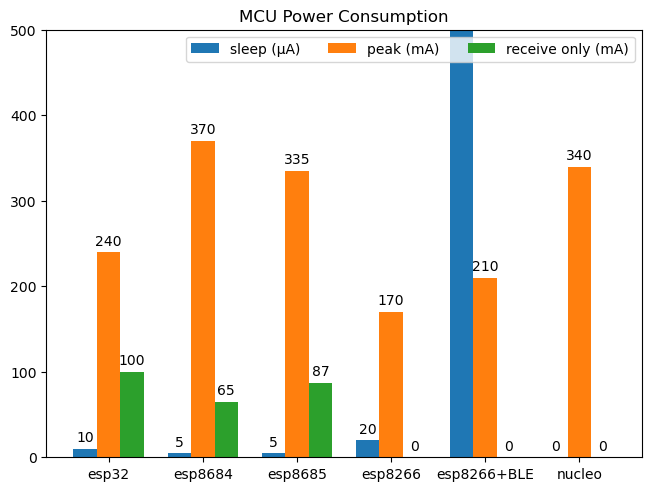

In [3]:
# plotting
x=np.arange(len(data.keys()))
width=.25
multiplier=0

fig,ax = plt.subplots(layout='constrained')

attributes = data[list(data.keys())[0]].keys()
for attribute, measurement in zip(attributes, [[board[attribute] for board in data.values()] for attribute in attributes]):
    offset = width * multiplier
    rects = ax.bar(x+offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier+=1

ax.legend(loc='best', ncols=3)
ax.set_title("MCU Power Consumption")
ax.set_xticks(x + width, data.keys())
ax.set_ylim(0, 500)
plt.savefig("/tmp/plot.png")
plt.show()

i think the esp32 looks better if we're measuring often, if we're measuring less often and have sufficient time to sleep, then it will be better to use the esp86845 is better.
let's calculate the percentages

In [4]:
for key, device in data.items():
    print(f"{key}\nsleep:\t\t{str(device['sleep (µA)'])+' µA' if device['sleep (µA)'] > 0 else 'none'}\npeak:\t\t{device['peak (mA)']} mA\nreceive only:\t{str(device['receive only (mA)'])+' mA' if device['receive only (mA)'] > 0 else 'none'}\n")



esp32
sleep:		10 µA
peak:		240 mA
receive only:	100 mA

esp8684
sleep:		5 µA
peak:		370 mA
receive only:	65 mA

esp8685
sleep:		5 µA
peak:		335 mA
receive only:	87 mA

esp8266
sleep:		20 µA
peak:		170 mA
receive only:	none

esp8266+BLE
sleep:		3020 µA
peak:		210 mA
receive only:	none

nucleo
sleep:		none
peak:		340 mA
receive only:	none



In [17]:
import multiprocessing as mp

device = None

def genData(d):
    global device
    # print(f"\r{d['i']}", end="")
    if not d['i']%3600:
        print(f"\rProgress: {d['i']}", end="")
    return sum([data[d['d']]['sleep (µA)'] if i%d['i'] else data[d['d']]['peak (mA)']*1000 for i in range(1, 86400)])

with  mp.Pool(4) as p:
    results = {}
    for key in data.keys():
        device = key
        print(f'device: {key}, data: {data[key]}')
        results[key] = p.map(genData, [{'i':i, 'd':key} for i in range(10, 86400)])
        print()

print("finished executing")
# print(esp32)
# print(esp8685)

device: esp32, data: {'sleep (µA)': 10, 'peak (mA)': 240, 'receive only (mA)': 100}
Progress: 75600
device: esp8684, data: {'sleep (µA)': 5, 'peak (mA)': 370, 'receive only (mA)': 65}
Progress: 75600
device: esp8685, data: {'sleep (µA)': 5, 'peak (mA)': 335, 'receive only (mA)': 87}
Progress: 75600
device: esp8266, data: {'sleep (µA)': 20, 'peak (mA)': 170, 'receive only (mA)': 0}
Progress: 75600
device: esp8266+BLE, data: {'sleep (µA)': 3020, 'peak (mA)': 210, 'receive only (mA)': 0}
Progress: 75600
device: nucleo, data: {'sleep (µA)': 0, 'peak (mA)': 340, 'receive only (mA)': 0}
Progress: 75600
finished executing


In [20]:
from math import floor

for device in data.keys():
    if device == "esp32":
        continue
    for i in range(1, len(esp32)):
        if results[device][i] < results['esp32'][i]:
            pass
            #print(i)
            #print(esp32[i])
            #print(esp8685[i])
            #print(esp8685[i] < esp32[i])
            #print()
        else:
            breakpoint = i

    #print(f"breakpoint: {breakpoint}")
    print(f'{device} breakpoint:\t{floor(breakpoint/3600)} hours')

esp8684 breakpoint:	5 hours
esp8685 breakpoint:	4 hours
esp8266 breakpoint:	23 hours
esp8266+BLE breakpoint:	23 hours
nucleo breakpoint:	2 hours
